In [1]:
## Import dabest_horizontal
import sys
sys.path.append('C:/Users/harry/OneDrive/Desktop/DABEST-python')
import dabest

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['font.size'] = 12

from scipy.stats import norm # Used in generation of populations.
import numpy as np
np.random.seed(9999) # Fix the seed so the results are replicable.
# pop_size = 10000 # Size of each population.
Ns = 20 # The number of samples taken from each population

# Create samples
c1 = norm.rvs(loc=3, scale=0.4, size=Ns)
c2 = norm.rvs(loc=3.5, scale=0.75, size=Ns)
c3 = norm.rvs(loc=3.25, scale=0.4, size=Ns)

t1 = norm.rvs(loc=3.5, scale=0.5, size=Ns)
t2 = norm.rvs(loc=2.5, scale=0.6, size=Ns)
t3 = norm.rvs(loc=3, scale=0.75, size=Ns)
t4 = norm.rvs(loc=3.5, scale=0.75, size=Ns)
t5 = norm.rvs(loc=3.25, scale=0.4, size=Ns)
t6 = norm.rvs(loc=3.25, scale=0.4, size=Ns)


# Add a `gender` column for coloring the data.
females = np.repeat('Female', Ns/2).tolist()
males = np.repeat('Male', Ns/2).tolist()
gender = females + males

# Add an `id` column for paired data plotting.
id_col = pd.Series(range(1, Ns+1))

# Combine samples and gender into a DataFrame.
df_2 = pd.DataFrame({'Control 1' : c1,     'Test 1' : t1,
                    'Control 2' : c2,     'Test 2' : t2,
                    'Control 3' : c3,     'Test 3' : t3,
                    'Test 4'    : t4,     'Test 5' : t5, 'Test 6' : t6,
                    'Gender'    : gender, 'ID'  : id_col})

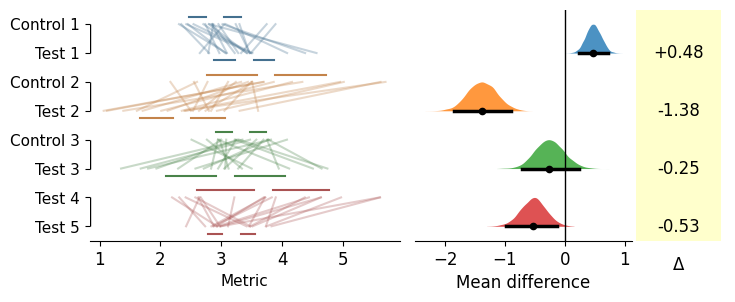

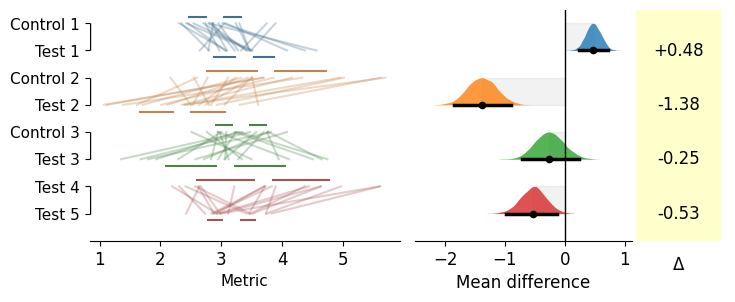

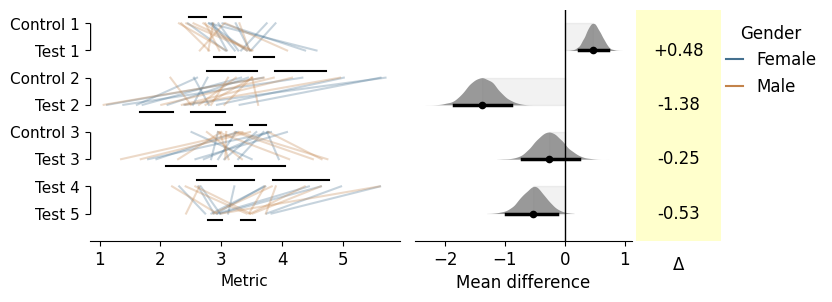

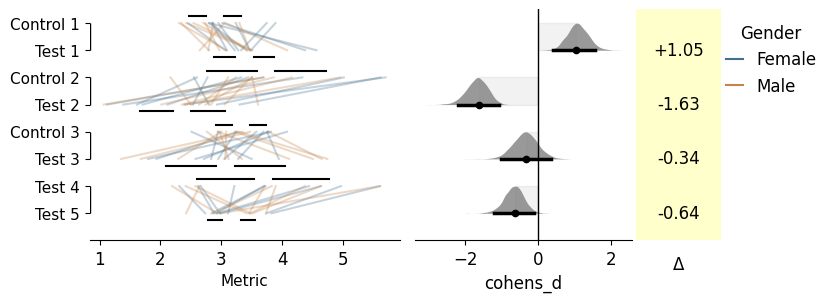

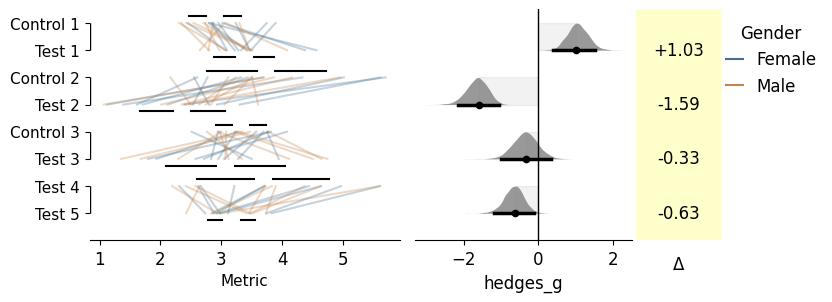

In [3]:
test = dabest.load(df_2, idx=(("Control 1", "Test 1"),('Control 2', 'Test 2'), ('Control 3', 'Test 3'), ('Test 4', 'Test 5')), paired='sequential', id_col='ID')
ESDFtest = test.mean_diff
ESDFcd = test.cohens_d
ESDFhg = test.hedges_g

figure,ax1 = plt.subplots(1,1, figsize=(8,3))
dab = ESDFtest.plot(horizontal=True,ax=ax1)

figure,ax1 = plt.subplots(1,1, figsize=(8,3))
dab = ESDFtest.plot(horizontal=True,ax=ax1, contrast_dots=True, contrast_bars=True)

figure,ax1 = plt.subplots(1,1, figsize=(8,3))
dab = ESDFtest.plot(horizontal=True,ax=ax1, color_col='Gender', contrast_dots=True, contrast_bars=True)

figure,ax1 = plt.subplots(1,1, figsize=(8,3))
dab = ESDFcd.plot(horizontal=True,ax=ax1, color_col='Gender', contrast_dots=True, contrast_bars=True)

figure,ax1 = plt.subplots(1,1, figsize=(8,3))
dab = ESDFhg.plot(horizontal=True,ax=ax1, color_col='Gender', contrast_dots=True, contrast_bars=True)


# Unpaired one control

c:\Users\harry\Anaconda3\envs\new-ds-valuation\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\harry\Anaconda3\envs\new-ds-valuation\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\harry\Anaconda3\envs\new-ds-valuation\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\harry\Anaconda3\envs\new-ds-valuation\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


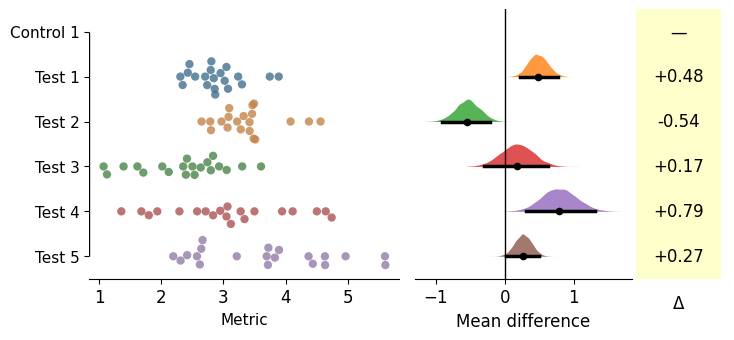

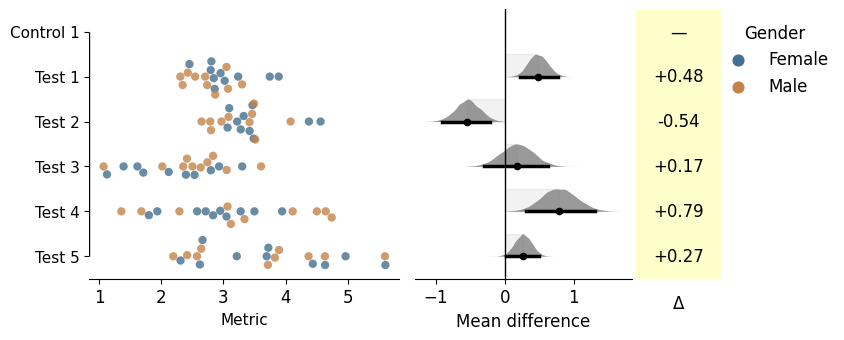

In [4]:
test = dabest.load(df_2, idx=(("Control 1", "Test 1",'Test 2', 'Test 3','Test 4', 'Test 5')), id_col='ID')
ESDFtest = test.mean_diff

figure,ax1 = plt.subplots(1,1, figsize=(8,3.5))
dab = ESDFtest.plot(horizontal=True,ax=ax1)

figure,ax1 = plt.subplots(1,1, figsize=(8,3.5))
dab = ESDFtest.plot(horizontal=True,ax=ax1, color_col='Gender', contrast_bars=True)

# Unpaired multiple controls

c:\Users\harry\Anaconda3\envs\new-ds-valuation\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\harry\Anaconda3\envs\new-ds-valuation\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


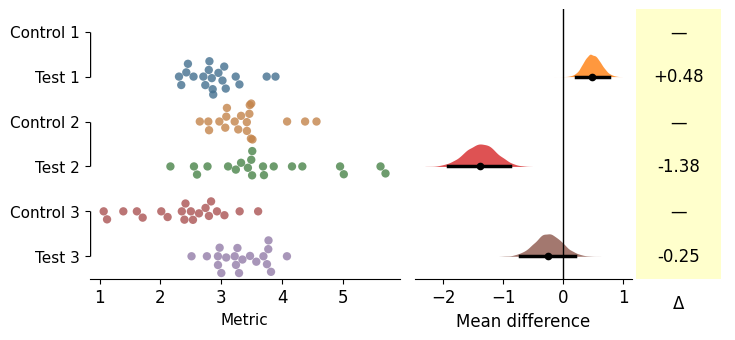

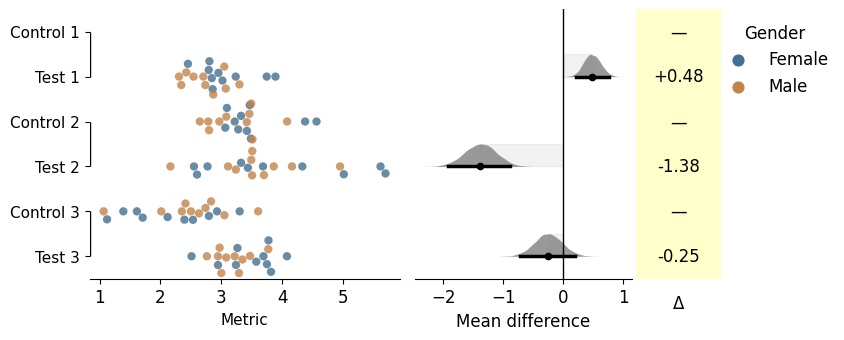

In [5]:
test = dabest.load(df_2, idx=(("Control 1", "Test 1"),('Control 2', 'Test 2'),('Control 3', 'Test 3')), id_col='ID')
ESDFtest = test.mean_diff

figure,ax1 = plt.subplots(1,1, figsize=(8,3.5))
dab = ESDFtest.plot(horizontal=True,ax=ax1)

figure,ax1 = plt.subplots(1,1, figsize=(8,3.5))
dab = ESDFtest.plot(horizontal=True,ax=ax1, color_col='Gender', contrast_bars=True)

# paired control vs test

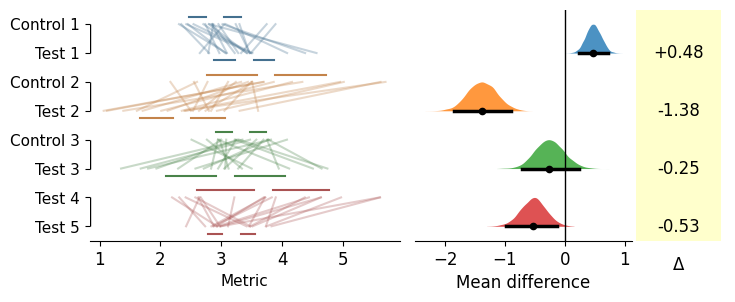

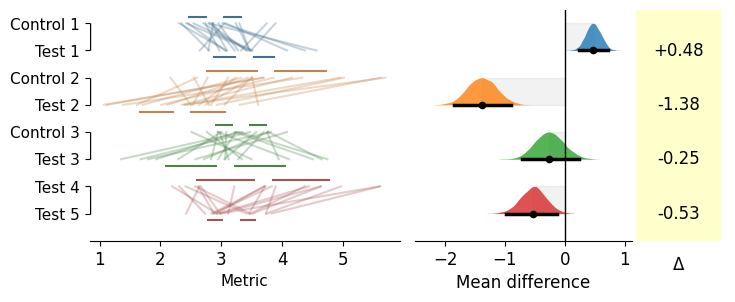

In [6]:
test = dabest.load(df_2, idx=(("Control 1", "Test 1"),('Control 2', 'Test 2'), ('Control 3', 'Test 3'), ('Test 4', 'Test 5')), paired='sequential', id_col='ID')
ESDFtest = test.mean_diff

figure,ax1 = plt.subplots(1,1, figsize=(8,3))
dab = ESDFtest.plot(horizontal=True,ax=ax1)

figure,ax1 = plt.subplots(1,1, figsize=(8,3))
dab = ESDFtest.plot(horizontal=True,ax=ax1, contrast_dots=True, contrast_bars=True)

# Paired control vs test with minimeta

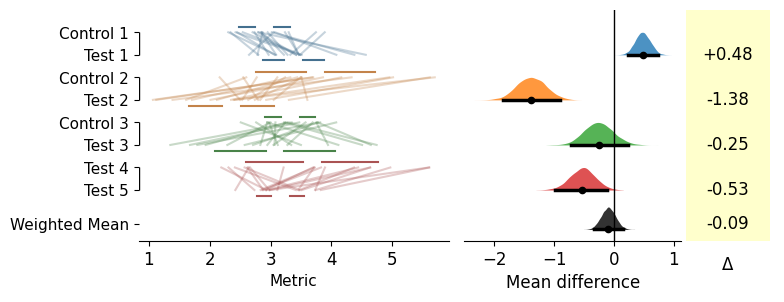

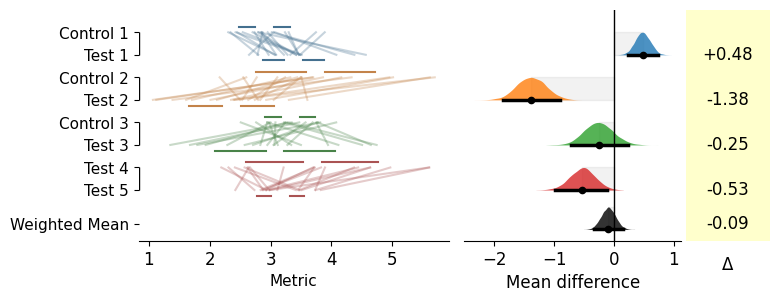

In [7]:
test = dabest.load(df_2, idx=(("Control 1", "Test 1"),('Control 2', 'Test 2'), ('Control 3', 'Test 3'), ('Test 4', 'Test 5')), paired='sequential', id_col='ID',mini_meta=True)
ESDFtest = test.mean_diff

figure,ax1 = plt.subplots(1,1, figsize=(8,3))
dab = ESDFtest.plot(horizontal=True,ax=ax1)

figure,ax1 = plt.subplots(1,1, figsize=(8,3))
dab = ESDFtest.plot(horizontal=True,ax=ax1, contrast_dots=True, contrast_bars=True)

# Paired repeated measures

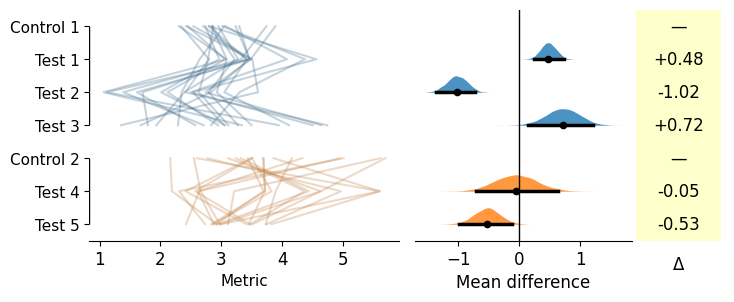

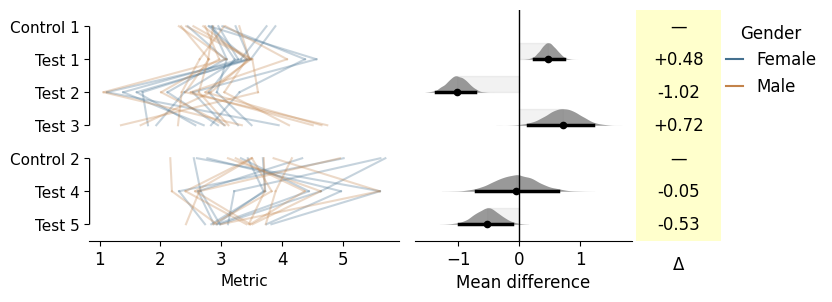

In [8]:
test = dabest.load(df_2, idx=(("Control 1", "Test 1", 'Test 2','Test 3'), ('Control 2', 'Test 4', 'Test 5')), paired='sequential', id_col='ID')
ESDFtest = test.mean_diff

figure,ax1 = plt.subplots(1,1, figsize=(8,3))
dab = ESDFtest.plot(horizontal=True,ax=ax1)

figure,ax1 = plt.subplots(1,1, figsize=(8,3))
dab = ESDFtest.plot(horizontal=True,ax=ax1, color_col='Gender', contrast_bars=True)